____

<font size=+4 color=#0248FA> ICA 11: Clustering

_____



Today you will take a dataset and perform three clustering algorithms on it. The goal is that you learn how to use `sklearn` for clustering. You will also use a metric to assess how well the clustering worked, since there are not only several algorithms but also choices within those algorithms. 

We will also think about our workflow, including two steps very important for clustering:
* scaling,
* dimensionality reduction.

That's it: you know all you need to know to get started! 

Today, we will use the penguins dataset. You will use this dataset in the HW for this week where you will compare clustering results to the labels, which we will ignore for this ICA. Anything you write here can be used in the HW.

Discuss with your group what do you next, given what the goals are for today. 

Does this dataset have any problems? You should do IDA and EDA on this dataset before getting too far.

In [1]:

import seaborn as sns
penguins = sns.load_dataset('penguins')
print(penguins.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


Do you think this code would be useful? Why or why not? Is this similar to what your group thought was appropriate? Is this a smart way to impute this dataset? Why not just drop the bad rows? 

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Impute missing values with the median
imputer = SimpleImputer(strategy='median')
penguins_imputed = imputer.fit_transform(penguins.select_dtypes(include=['float64']))

# Scale the data
scaler = StandardScaler()
penguins_scaled = scaler.fit_transform(penguins_imputed)


With the data cleaned, what is the next step? Discuss some possible steps with your group and put them in a markdown cell. 

There are several distinct answers - none of them right or wrong. 

____

What is the dimensionality of this dataset? Do you have any sense of whether the data is sparse in the space of the features? That is, are we subject to the curse of dimensionality? 

At a minimum, what does your group think about how we would visualize the penguins dataset? 

Is DR in order here, or not? In general, does DR help clustering? 

Write a summary of your group's discussion in a markdown cell. 


In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
penguins_pca = pca.fit_transform(penguins_scaled)

____

#### Which ML Models? 

In the lecture we discussed `Kmeans` and `DBSCAN`. So, let's definitely use those. But, let's add a third one so that we learn something new: `GaussianMixture`. 

Note that in the diagram I showed there was no category for `GaussianMixture`. What is it? It is generally thought of as a "probabalistic" clustering method; [what does that mean](https://scikit-learn.org/stable/modules/mixture.html)? Read about it [online](https://en.wikipedia.org/wiki/Mixture_model#Gaussian_mixture_model) and writing a summary of how it works. 

Once you have that written, make a table of the hyperparameters for each of these three clustering algorithms. Discuss with your group how you will choose these (hyper-)parameters.

Based on your decisions, modify the code below as needed. 
___



In [4]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, n_init="auto")
kmeans_labels = kmeans.fit_predict(penguins_pca)

C:\Users\mahya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [5]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(penguins_pca)


In [8]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3)
gmm_labels = gmm.fit_predict(penguins_pca)


C:\Users\mahya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


How can you visualize your results? What visualization tools are available for clustering? How do the results change as you vary the hyperparameters?  

_____

Although visualization is extremely important, especially in this case where it is possible, we often would like something more quantitative. 

Do your group members have any ideas for how to get more out of the labels? 

_____

Would something along these lines be of use? What does this do, and what can you plot? 

In [9]:
from sklearn.metrics import silhouette_score

kmeans_score = silhouette_score(penguins_pca, kmeans_labels)
dbscan_score = silhouette_score(penguins_pca, dbscan_labels)
gmm_score = silhouette_score(penguins_pca, gmm_labels)

print(f'K-Means Silhouette Score: {kmeans_score}')
print(f'DBSCAN Silhouette Score: {dbscan_score}')
print(f'GMM Silhouette Score: {gmm_score}')


K-Means Silhouette Score: 0.5362445553132081
DBSCAN Silhouette Score: 0.49884395286058525
GMM Silhouette Score: 0.504974775808945


____

Finally, two things: summarize the overall workflow what was used here as a step-by-step set of instructions you could hand to your future self when you need to do clustering. Be very detailed.

Second, this data is labeled. In the HW you will extend this ICA to compare the clusters to the actual classes we, in fact, know. Discuss with your group how you would go about doing checking clustering using class labels. For example, what would you plot from, say, KMeans and KNN to see if the clustering algorithms can actually find the known classes? Should they? You don't know need to do anything with it, but look through the code below to see what it suggests.



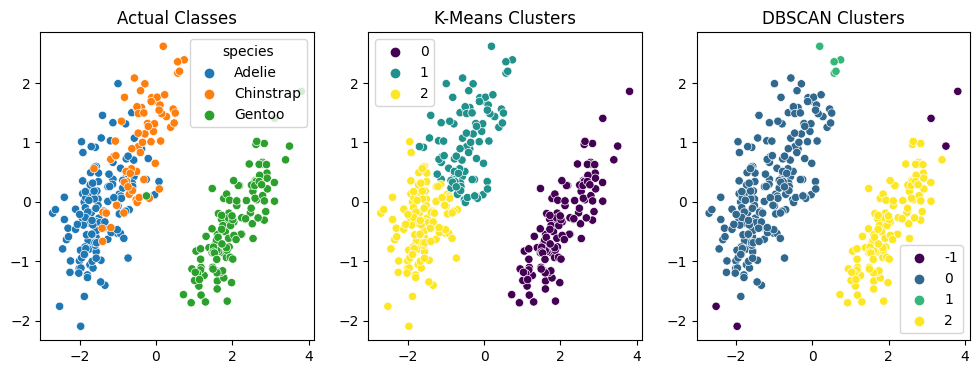

In [10]:
import matplotlib.pyplot as plt

# Actual classes
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.scatterplot(x=penguins_pca[:, 0], y=penguins_pca[:, 1], hue=penguins['species'])
plt.title('Actual Classes')

# K-Means clusters
plt.subplot(1, 3, 2)
sns.scatterplot(x=penguins_pca[:, 0], y=penguins_pca[:, 1], hue=kmeans_labels, palette='viridis')
plt.title('K-Means Clusters')

# DBSCAN clusters
plt.subplot(1, 3, 3)
sns.scatterplot(x=penguins_pca[:, 0], y=penguins_pca[:, 1], hue=dbscan_labels, palette='viridis')
plt.title('DBSCAN Clusters')

plt.show()
